In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [57]:
df = pd.read_csv("japan_population.csv")
df.head()

,集計年,都道府県コード,都道府県名,総人口
0,1960,1,北海道,5039206.0
1,1960,2,青森県,1426606.0
2,1960,3,岩手県,1448517.0
3,1960,4,宮城県,1743195.0
4,1960,5,秋田県,1335580.0


In [58]:
df.shape

(3055, 4)

In [59]:
df.query("都道府県名=='東京都'")

,集計年,都道府県コード,都道府県名,総人口
12,1960,13,東京都,9683802.0
59,1961,13,東京都,9967000.0
106,1962,13,東京都,10224000.0
153,1963,13,東京都,10470000.0
200,1964,13,東京都,10668000.0
247,1965,13,東京都,10869244.0
294,1966,13,東京都,11018000.0
341,1967,13,東京都,11162000.0
388,1968,13,東京都,11286000.0
435,1969,13,東京都,11367000.0


In [60]:
tokyo = df[df["都道府県名"]=="東京都"]
tokyo.head()
tokyo.shape

(65, 4)

In [61]:
#X = tokyo.iloc[0:65,3]
#y = tokyo.iloc[1:66,3]
#X = X.values.reshape(65,1)
#X[0:10]
X = np.empty((56,1),dtype=np.uint32)
y = np.empty((56,1),dtype=np.uint32)

for i in range(56):
    X[i][0] = tokyo.iloc[i][3]
    y[i][0] = tokyo.iloc[i+1][3]
    
print(X[0:10])
print(y[0:10])

[[ 9683802]
 [ 9967000]
 [10224000]
 [10470000]
 [10668000]
 [10869244]
 [11018000]
 [11162000]
 [11286000]
 [11367000]]
[[ 9967000]
 [10224000]
 [10470000]
 [10668000]
 [10869244]
 [11018000]
 [11162000]
 [11286000]
 [11367000]
 [11408071]]


In [62]:
X_train = X[:50]
X_test = X[50:]
y_train = y[:50]
y_test = y[50:]

In [63]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
y_pred = model.predict(X_test)
y_pred = y_pred.astype(np.uint32)
y_pred

array([[13149404],
       [13185920],
       [13219966],
       [13289004],
       [13376011],
       [13485972]], dtype=uint32)

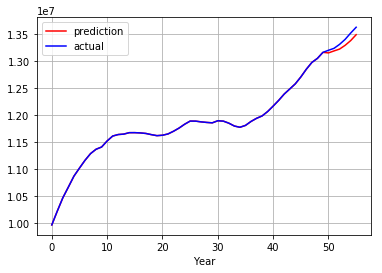

In [69]:
y_pred_gr = np.concatenate([y_train,y_pred])
plt.plot(range(56),y_pred_gr,color="red",label="prediction")
plt.plot(range(56),y,color="blue",label="actual")
plt.xlabel("Year")
plt.legend(loc="upper left")
plt.grid(True)